In [21]:
# Import libraries
import os
import requests
from zipfile import ZipFile
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

In [22]:
# Define working directory
os.chdir('/Users/monlopez/Documents/MON/data_bases/covid-19/Mayo')

In [23]:
# Dowload ZipFile of Governmet webpage
# https://datos.gob.mx/busca/dataset/informacion-referente-a-casos-covid-19-en-mexico
url = 'http://187.191.75.115/gobmx/salud/datos_abiertos/datos_abiertos_covid19.zip'
r = requests.get(url)

with open('/Users/monlopez/Documents/MON/data_bases/covid-19/Mayo/datos_abiertos_covid19.zip', 'wb') as f:
    f.write(r.content)

In [24]:
# UnZip
with ZipFile('datos_abiertos_covid19.zip', 'r') as zipObj:
   # Extraxt zip contents in the working directory  
   zipObj.extractall()

In [25]:
# Import dataset
# The file name will change depending of the day
covid_19 = pd.read_csv("200512COVID19MEXICO.csv", encoding = "ISO-8859-1") 
covid_19.shape

(142204, 35)

In [26]:
covid_19

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-05-12,0ae84c,2,1,9,1,9,9,16,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
1,2020-05-12,114e13,2,3,2,2,2,2,2,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97
2,2020-05-12,1082f8,2,3,15,2,15,15,39,1,...,2,2,2,2,2,1,99,MÃ©xico,99,97
3,2020-05-12,046a2a,2,3,2,2,2,2,2,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97
4,2020-05-12,089864,2,3,27,2,27,27,4,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142199,2020-05-12,194695,1,12,15,2,15,15,88,1,...,2,2,2,2,2,3,99,MÃ©xico,99,97
142200,2020-05-12,195eb0,1,12,7,1,7,7,101,1,...,2,2,2,2,1,3,99,MÃ©xico,99,97
142201,2020-05-12,014b72,1,12,15,1,20,15,13,2,...,2,2,2,2,1,3,99,MÃ©xico,99,2
142202,2020-05-12,13231d,1,12,19,2,19,19,36,1,...,2,2,2,1,2,3,99,MÃ©xico,99,97


In [57]:
# SARS-CoV-2
covid_yes = covid_19[covid_19.RESULTADO == 1]
covid_no = covid_19[covid_19.RESULTADO == 2]
covid_ns = covid_19[covid_19.RESULTADO == 3]

In [58]:
covid_si = (covid_yes.groupby(['FECHA_INGRESO'])['RESULTADO'].count()).to_frame()
covid_no = (covid_no.groupby(['FECHA_INGRESO'])['RESULTADO'].count()).to_frame()
covid_ns = (covid_ns.groupby(['FECHA_INGRESO'])['RESULTADO'].count()).to_frame()

In [62]:
# CumSum
covid_si_cum = covid_si.cumsum()[['RESULTADO']]
covid_no_cum = covid_no.cumsum()[['RESULTADO']]
covid_ns_cum = covid_ns.cumsum()[['RESULTADO']]

In [67]:
# Combine by FECHA_INGRESO
merged_left = pd.merge(left=covid_no_cum, right=covid_si_cum, how='left', left_on='FECHA_INGRESO', right_on='FECHA_INGRESO')
merged_left = pd.merge(left=merged_left, right=covid_ns_cum, how='left', left_on='FECHA_INGRESO', right_on='FECHA_INGRESO')

In [68]:
# Rename
merged_left = merged_left.rename(columns={"RESULTADO_x": "Negativo", "RESULTADO_y": "Positivo", "RESULTADO": "Sospechoso"})
merged_left

,Negativo,Positivo,Sospechoso
FECHA_INGRESO,,,
2020-01-01,5,NaN,NaN
2020-01-02,21,NaN,NaN
2020-01-03,39,NaN,NaN
2020-01-04,45,NaN,NaN
2020-01-05,59,NaN,NaN
...,...,...,...
2020-05-08,79220,37306.0,12034.0
2020-05-09,80194,37834.0,13698.0
2020-05-10,80588,38141.0,15221.0


Text(0.5, 1.0, 'Casos acumulados por día')

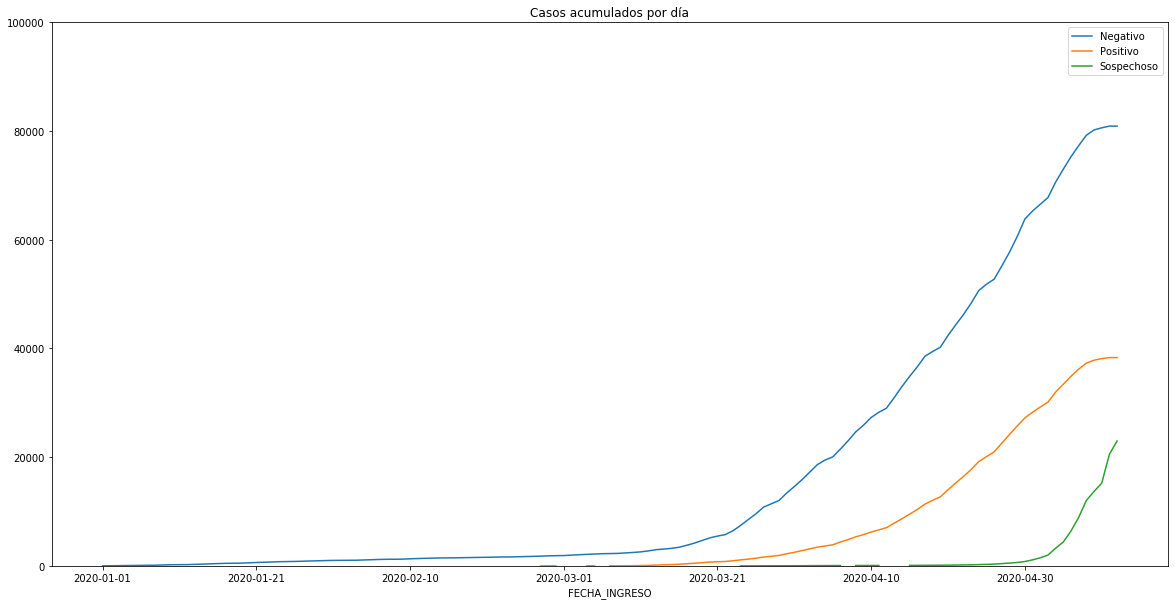

In [72]:
plot1 = merged_left.plot(figsize=(20,10)) 
plot1.set_ylim([0, 100000])
plt.title(f"Casos acumulados por día")

In [73]:
# Grupping by result
resultado = covid_19.groupby('RESULTADO').count()
resultado = resultado[['FECHA_ACTUALIZACION']]
resultado

,FECHA_ACTUALIZACION
RESULTADO,
1,38324
2,80900
3,22980


In [74]:
# Total  
totales = resultado.FECHA_ACTUALIZACION.sum()
totales

142204

In [75]:
# Positive SARS-CoV-2
covid_yes = covid_19[covid_19.RESULTADO == 1]
covid_si = (covid_yes.groupby(['FECHA_INGRESO'])['RESULTADO'].count()).to_frame()
positivos = covid_si.RESULTADO.sum()
positivos

38324

In [76]:
# Negative SARS-CoV-2
covid_no = covid_19[covid_19.RESULTADO == 2]
covid_no = (covid_no.groupby(['FECHA_INGRESO'])['RESULTADO'].count()).to_frame()
negativos = covid_no.RESULTADO.sum()
negativos

80900

In [77]:
# Not confirmed SARS-CoV-2
covid_sosp = covid_19[covid_19.RESULTADO == 3]
covid_sosp = (covid_sosp.groupby(['FECHA_INGRESO'])['RESULTADO'].count()).to_frame()
sospechosos = covid_sosp.RESULTADO.sum()
sospechosos

22980

In [78]:
# Positive (%)
porcentaje_positivos = (positivos/totales) * 100
porcentaje_positivos

26.950015470732186

In [79]:
# Negative (%)
porcentaje_negativos = (negativos / totales) * 100
porcentaje_negativos

56.89010154426036

In [80]:
# Suspicious
porcentaje_sospechosos = (sospechosos / totales) * 100
porcentaje_sospechosos

16.159882985007453

In [81]:
# Positive + Suspicious (%)
porcentaje_positivos + porcentaje_sospechosos

43.10989845573964

<BarContainer object of 3 artists>

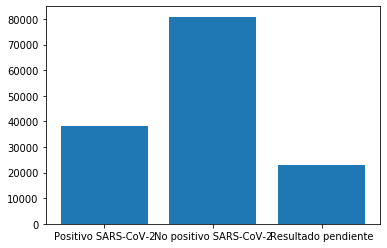

In [82]:
# data to plot
n_groups = 3
result = ('Positivo SARS-CoV-2', 'No positivo SARS-CoV-2', 'Resultado pendiente')
casos = (positivos, negativos, sospechosos)
# Create bars
plt.bar(result, casos)